In [77]:
import MEbatch_hs
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(profile):
    for i in range(4):

        plt.subplot(2,2,i+1)
        plt.plot((profile.T)[i])

Константные параметры линии:

In [78]:
l_v = [6302.5, 2.5, 1]
argument = np.linspace(6302.0692255, 6303.2544205, 56)
line_arg = 1000*(argument - 6302.5)

Сумма* параметров №6 и №7 - интенсивность. Она определяет величину профиля и при генерации синтетического спектра просто домножается в конце на посчитанный профиль единичной амплитуды.

В реальных измерениях интенсивность значительно меняется. Для hinode она лежит в интервале около [4000 : 20000]

In [79]:
p_v0 = np.array([500, 20, 20, 50, 1, 10, 4000, 4000, 0])
p_v1 = np.array([500, 20, 20, 50, 1, 10, 20000, 20000, 0])

In [80]:
profile0 = MEbatch_hs.ME(l_v, p_v0, line_arg)
profile1 = MEbatch_hs.ME(l_v, p_v1, line_arg)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

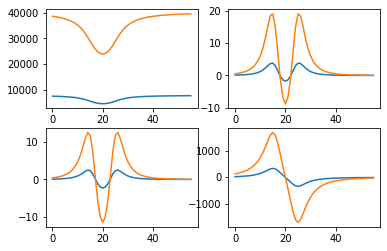

In [81]:
plot_spectrum(profile0)
plot_spectrum(profile1)

Видно, что при прочих равных параметрах спектры значительно отличаются друг от друга. Учет этого значительно усложнил бы задачу обучения. 

Однако, значение I (первый профиль) в крайних точках примерно соответствует интенсивности (точное соотношение может быть непостоянным, но не будет далеко от 1). Таким образом, перед инверсией профиля можно поделить его на эту величину:

In [82]:
profile0 = profile0 / profile0[0][0]
profile1 = profile1 / profile1[0][0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

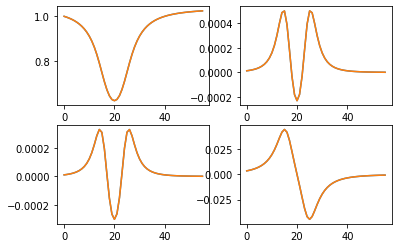

In [83]:
plot_spectrum(profile0)
plot_spectrum(profile1)

(Спектры совпали, т.к. остальные параметры равны)

Таким образом, можно значительно снизить искомый диапазон по величине интенсивности, оставив небольшой интервал около 1.

В то же время, величина интенсивности также несет в себе полезную информацию для инверсии. В реальных наблюдениях падение интенсивности (т.е. снижение температуры) является следствием сильного магнитного поля. 

Следовательно, может быть полезным не "выкидывать" величину нормировки, а также подавать на вход сети.